# Import the libraries

In [270]:
import texthero as hero
import pandas as pd
pd.options.mode.chained_assignment = None  
import nltk
import seaborn as sns
import numpy as np

# Data load

First, download your own Google search history on https://takeout.google.com/?pli=1. Then, parse the HTML file containing the search history (MonActivité.html) into a csv file from scraper.py

In [271]:
data = pd.read_csv("./D_searchData.csv") 

In [272]:
data[25:30]

,URL,Recherche,searchDay,searchMonth,searchYear
25,https://www.google.com/url?q=https://univ-amu....,"Résultats pour ""intelligence artificielle"" - S...",16,mai,2020
26,https://www.google.com/url?q=https://univ-amu....,"Résultats pour ""intelligence artificielle"" - S...",16,mai,2020
27,https://www.google.com/url?q=https://bu.univ-a...,Bibliothèques Universitaires,16,mai,2020
28,https://www.google.com/url?q=https://ident.uni...,Aix-Marseille Université - Authentification,16,mai,2020
29,https://www.google.com/url?q=https://livre.fna...,Apprentissage machine - Clé de l'intelligence ...,16,mai,2020


In [273]:
data_history = data[["Recherche","searchMonth","searchYear"]]


# Text Preprocessing in Natural Language Processing

## Clean data

In [274]:
data_history['Recherche'] = hero.remove_urls(data_history['Recherche'])
data_history[25:30]

,Recherche,searchMonth,searchYear
25,"Résultats pour ""intelligence artificielle"" - S...",mai,2020
26,"Résultats pour ""intelligence artificielle"" - S...",mai,2020
27,Bibliothèques Universitaires,mai,2020
28,Aix-Marseille Université - Authentification,mai,2020
29,Apprentissage machine - Clé de l'intelligence ...,mai,2020


In [275]:
data_history['Recherche'] = hero.clean(data_history['Recherche'])

The clean() method runs seven functions when you pass a pandas series. These seven functions are:

- lowercase(s): Lowercases all text.
- remove_diacritics(): Removes all accents from strings.
- remove_stopwords(): Removes all stop words.
- remove_digits(): Removes all blocks of digits.
- remove_punctuation(): Removes all string.punctuation 
- fillna(s): Replaces unassigned values with empty spaces.
- remove_whitespace(): Removes all white space between words

In [276]:
data_history[25:30]

,Recherche,searchMonth,searchYear
25,resultats pour intelligence artificielle summo...,mai,2020
26,resultats pour intelligence artificielle summo...,mai,2020
27,bibliotheques universitaires,mai,2020
28,aix marseille universite authentification,mai,2020
29,apprentissage machine cle de l intelligence ar...,mai,2020


Tokenization is the process of cutting a text into smaller pieces called tokens, most often words can be considered as tokens. It will be useful for stopwords below. 

In [277]:
data_history['Recherche'] = hero.tokenize(data_history['Recherche'])
data_history[25:30]

,Recherche,searchMonth,searchYear
25,"[resultats, pour, intelligence, artificielle, ...",mai,2020
26,"[resultats, pour, intelligence, artificielle, ...",mai,2020
27,"[bibliotheques, universitaires]",mai,2020
28,"[aix, marseille, universite, authentification]",mai,2020
29,"[apprentissage, machine, cle, de, l, intellige...",mai,2020


"stop words" usually refers to the most common words in a language like 'un', 'des',... 
These words do not carry important meaning and are usually removed from texts. For this, we can remove them easily, by storing a list of words that you consider to stop words.

Normally the clean method has the remove_stopwords function which allows them to be removed. It seems that this function don't recognize french stopwords. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages, so we will use this corpus of stopwords in french. 


In [278]:
#nltk.download('stopwords')
stopWords = nltk.corpus.stopwords.words('french')

print(nltk.corpus.stopwords.words('french'))

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [279]:
def removeStopWords(words):
    removed = [w for w in words if not w in stopWords]
    
    return removed;

In [280]:
data_history['Recherche'] = data_history['Recherche'].apply(removeStopWords)

In [281]:
data_history[25:30]

,Recherche,searchMonth,searchYear
25,"[resultats, intelligence, artificielle, summon...",mai,2020
26,"[resultats, intelligence, artificielle, summon...",mai,2020
27,"[bibliotheques, universitaires]",mai,2020
28,"[aix, marseille, universite, authentification]",mai,2020
29,"[apprentissage, machine, cle, intelligence, ar...",mai,2020


Remove the words having length <= 2 

In [282]:
def clean_length(token):
    return [i for i in token if len(i)>2]

In [283]:
data_history['Recherche'] = data_history['Recherche'].apply(clean_length)

In [284]:
data_history[25:30]

,Recherche,searchMonth,searchYear
25,"[resultats, intelligence, artificielle, summon...",mai,2020
26,"[resultats, intelligence, artificielle, summon...",mai,2020
27,"[bibliotheques, universitaires]",mai,2020
28,"[aix, marseille, universite, authentification]",mai,2020
29,"[apprentissage, machine, cle, intelligence, ar...",mai,2020


Convert the list of tokens into back to the string.

In [285]:
data_history['Recherche']=data_history.Recherche.astype(str).str.replace('\[|\]|\'|\,', '')

In [286]:
data_history[25:30]

,Recherche,searchMonth,searchYear
25,resultats intelligence artificielle summon aix...,mai,2020
26,resultats intelligence artificielle summon aix...,mai,2020
27,bibliotheques universitaires,mai,2020
28,aix marseille universite authentification,mai,2020
29,apprentissage machine cle intelligence artific...,mai,2020


# Visualisation

In [287]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
#add a list of stopwords to the stopwords
#stop_w = []
custom_stopwords = default_stopwords.union(set(stop_w))
#Call remove_stopwords and pass the custom_stopwords list

data_history['Recherche'] = hero.remove_stopwords(data_history['Recherche'], custom_stopwords)
data_history[25:30]

,Recherche,searchMonth,searchYear
25,resultats intelligence artificielle summon aix...,mai,2020
26,resultats intelligence artificielle summon aix...,mai,2020
27,bibliotheques universitaires,mai,2020
28,aix marseille universite authentification,mai,2020
29,apprentissage machine cle intelligence artific...,mai,2020


In [294]:
data_history['Recherche'].replace('   ', np.nan, inplace=True)

In [296]:
data_history.dropna(subset=['Recherche'], inplace=True)

## Top 20 words

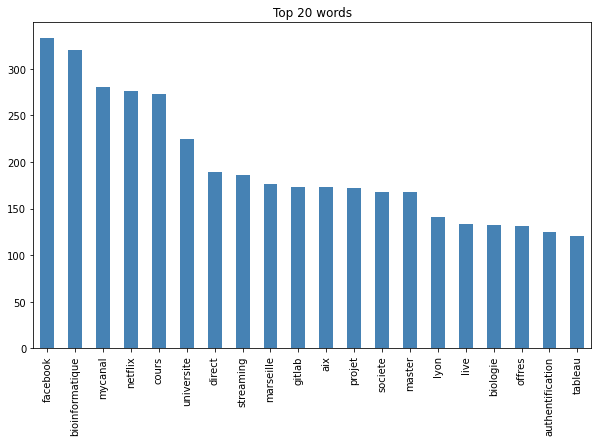

In [298]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
NUM_TOP_WORDS = 20
top_20 = hero.visualization.top_words(data_history['Recherche']).head(NUM_TOP_WORDS)
# Draw the bar chart
top_20.plot.bar(rot=90, title="Top 20 words",color="steelblue")
plt.show(block=True)

## Wordcloud 

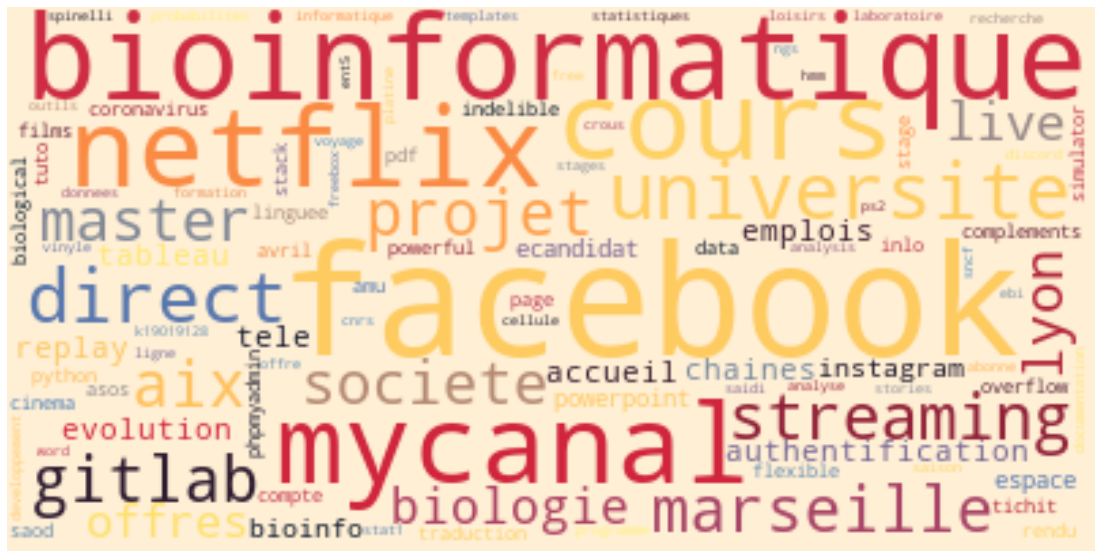

In [299]:
#Plot wordcloud image using WordCloud method

hero.wordcloud(data_history.Recherche, max_words=100,)




We can filter according to a period and determine the actuality

In [300]:
covid19=data_history[(data_history['searchYear']==2020)&(data_history['searchMonth']=='mars')|(data_history['searchMonth']=='avr.')
                                                                                              |(data_history['searchMonth']=='mai')]
                                                                                               
                                                                                               
                                                                                               

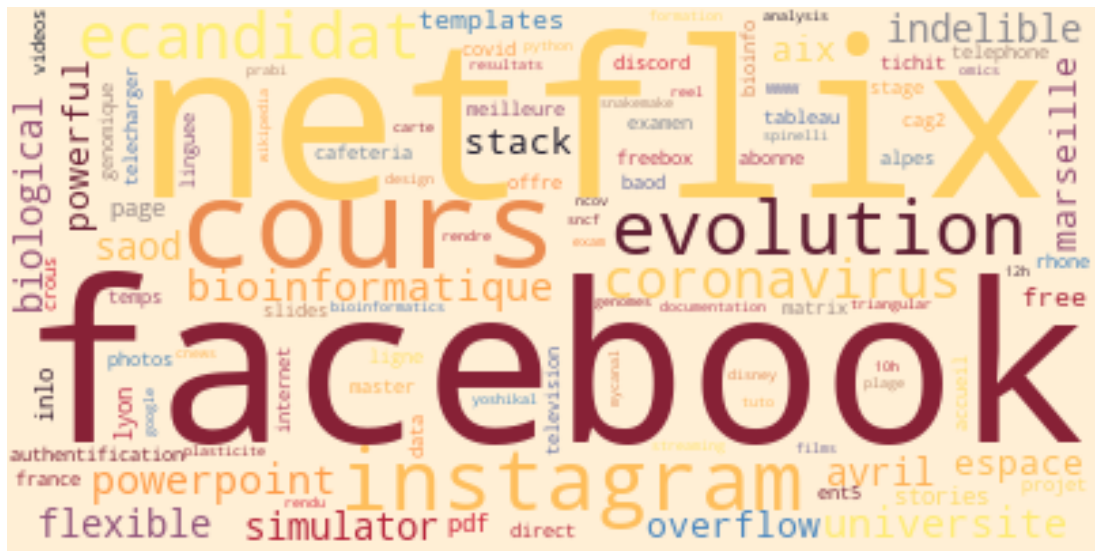

In [301]:
hero.wordcloud(covid19.Recherche, max_words=100,)

In [302]:
column_names = ["content","tfidf", "kmeans_labels"]
news = pd.DataFrame(columns = column_names)

In [303]:
# collect 30 clean content.
news["content"] = data_history.Recherche # convert them into tf-idf features.
news['tfidf'] = (
    data_history['Recherche']
    .pipe(hero.tfidf)
)# perform clustering algorithm by using kmeans() 
news['kmeans_labels'] = (
    news['tfidf']
    .pipe(hero.kmeans, n_clusters=5)
    .astype(str)
)

/Users/swearit/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect

/Users/swearit/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



In [304]:
news[["content","kmeans_labels"]].head()


,content,kmeans_labels
0,suivre lettre colissimo envoi chronopost poste,0
1,professeur professeure universite metier etude...,0
2,promotions sklum,0
3,porte rouleau papier dessin dahly sklum,0
4,sphere fhera sklum,0


In [305]:
#perform pca
news['pca'] = news['tfidf'].pipe(hero.pca)#show scatterplot
hero.scatterplot(news, 'pca', color='kmeans_labels', title="news")